In this project, I will look at data from the stock market, especially for the technology stocks. It includes getting stock information, visualizing it and analyzing the risk of a stock based on its performance history. And finally, I'll do some predictions to the future stock prices via Monte Carlo method.

Questions to be solved:


- What was the change in price of the stock over time?
- What was the daily return of the stock on average?
- What was the mobing average of the various stocks?
- What was the correlation between different stocks' closing prices?
- What was the correlation between different stocks' daily returns?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behavior?

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [27]:
from pandas_datareader import data, wb

from datetime import datetime

from pandas_datareader.data import DataReader

from __future__ import division

In [28]:
#Use Yahoo and Pandas to grab some stock data from tech stocks:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [29]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [30]:
for stock in tech_list:
    globals()[stock] =DataReader(stock,'yahoo',start,end)
    
#Now, we have four data frames and it's all stock information.

In [33]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951
2019-05-31,1109.599976,1100.180054,1101.290039,1103.630005,1507800,1103.630005
2019-06-03,1065.500000,1025.000000,1065.500000,1036.229980,5130600,1036.229980
2019-06-04,1056.050049,1033.689941,1042.900024,1053.050049,2833500,1053.050049


In [34]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,256.192047,250.436969,252.936023,253.546732,3.353064e+07,252.087937
std,43.862714,42.677891,43.118137,43.469474,1.713816e+07,43.940984
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,212.884998,208.837502,210.684998,209.847496,2.186125e+07,207.795982
50%,258.879990,250.699997,255.770004,257.184998,2.851040e+07,255.117470
75%,293.687500,285.654991,287.167503,289.679993,3.804492e+07,288.415413
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [35]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-29 to 2020-05-29
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


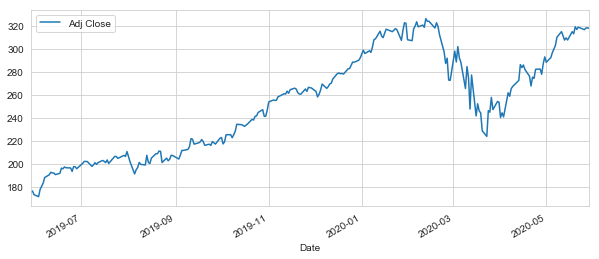

In [37]:
#Take a look at the historical view of the closing price:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

It mapped out the adjusted closing price for a year worth of Apple stock and we did it in one line.

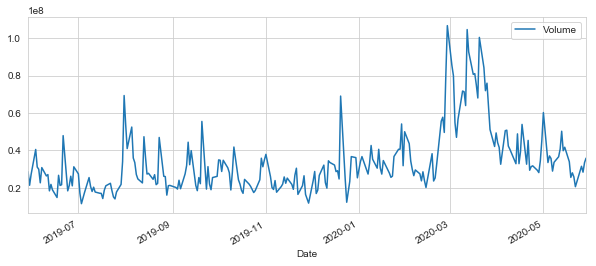

In [38]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

It shows the total colume of stock being traded each day over the past year.

In [44]:
#Moving Averages for Apple:
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    #Making additional three columns for 10, 20 and 50 moving day averages:
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()


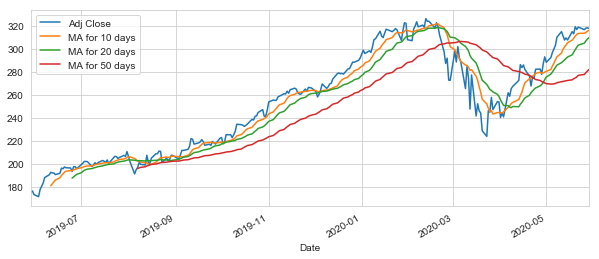

In [45]:
#Plot MAs:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

As we take the moving averages for more days at a time, it's going to get a smoother line. It's not going to be as reliant on the daily fluctuations for its general trend. However, it's not guaranteed to perfectly predict the future but it just simplifies the price data by smoothing it out and creating one flowing line.

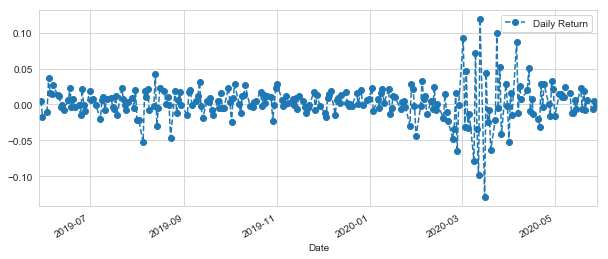

In [46]:
#Daily Returns:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True, linestyle='--',marker='o')

What this plot means is on any given day, what was your percent return on your money.

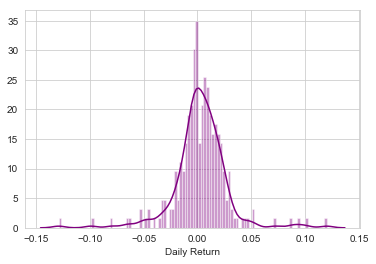

In [48]:
#Use a histogram to get the average daily return of the past year:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

So, this is the histgram of the daily return of the last year. It looks like a normal distribution curve, so we can say the average daily return is around 0.

In [50]:
#The returns of all the stocks:
#Build a data frame with all of the adjusted close columns for each of those stock's dataframes:

closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [51]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-29,175.288025,1819.189941,1116.459961,123.421265
2019-05-30,176.197189,1816.319946,1117.949951,124.201653
2019-05-31,173.005280,1775.069946,1103.630005,122.176575
2019-06-03,171.256134,1692.689941,1036.229980,118.383247
2019-06-04,177.521378,1729.560059,1053.050049,121.662903


This is the adjusted closing price data frame including all our stock companies.

In [52]:
tech_rets = closing_df.pct_change()

In [53]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-29,NaN,NaN,NaN,NaN
2019-05-30,0.005187,-0.001578,0.001335,0.006323
2019-05-31,-0.018116,-0.022711,-0.012809,-0.016305
2019-06-03,-0.010110,-0.046409,-0.061071,-0.031048
2019-06-04,0.036584,0.021782,0.016232,0.027704


This is the daily percentage returns for each stock. So, we can compare the daily return percentage for two stocks to see how they're correlated.

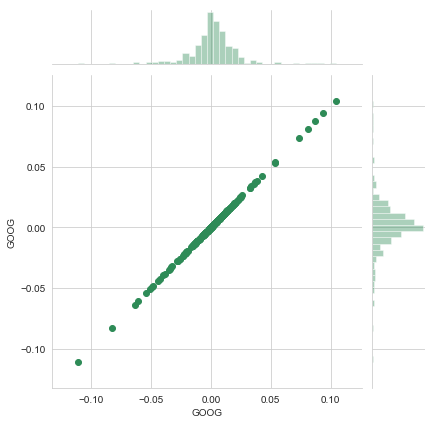

In [54]:
#Compare Google to itself:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

Absolutely it gives a perfectly linear relationship because you compare one stock to itself.

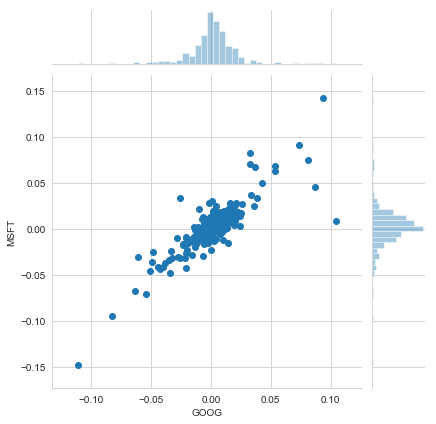

In [55]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

This is the comparison between Google and Microsoft, we can see the scatter plots shows a almost perfectly linear relationship. The slope of the line seems to be around 1.5 and the Pearson priduct-moment correlation coefficient values is around 0.8

In [57]:
#Comparison Analysis:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-29,NaN,NaN,NaN,NaN
2019-05-30,0.005187,-0.001578,0.001335,0.006323
2019-05-31,-0.018116,-0.022711,-0.012809,-0.016305
2019-06-03,-0.010110,-0.046409,-0.061071,-0.031048
2019-06-04,0.036584,0.021782,0.016232,0.027704


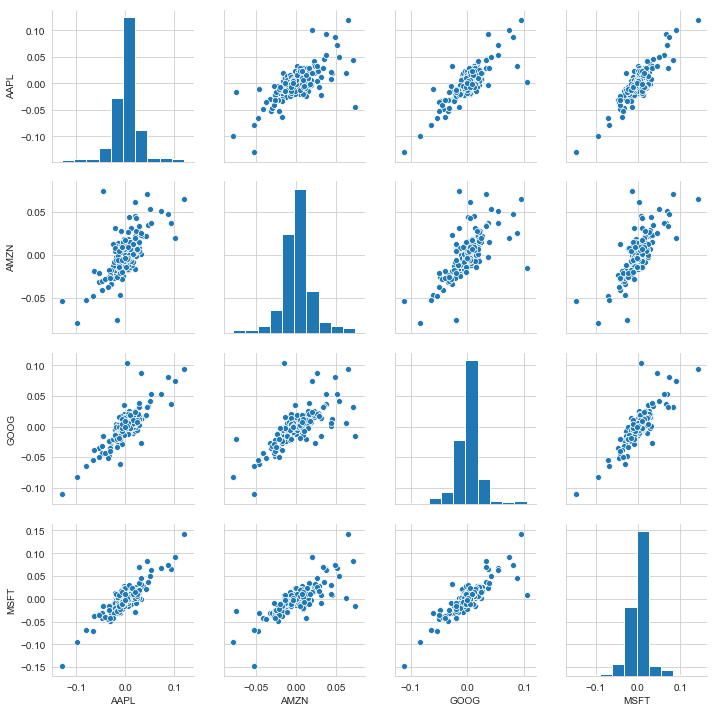

In [58]:
sns.pairplot(tech_rets.dropna())

The plots on the diagonal line are histograms of every stock's daily return. On the upper triangle and the lower triangle, there are correlation scatter plots. we can see, for instance, Microsoft and Google have a almost perfect correlation.

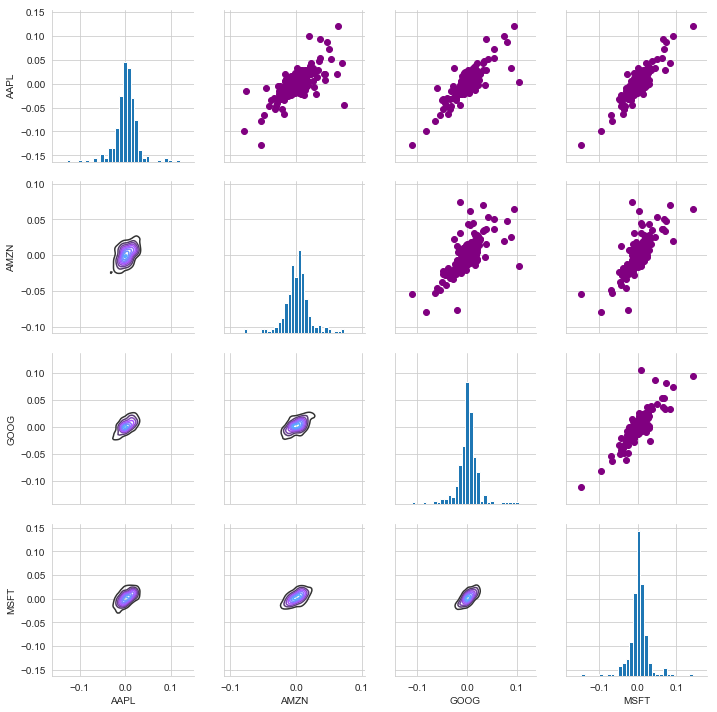

In [60]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Surprisingly, each pair seems to have a certain extent of correlation.

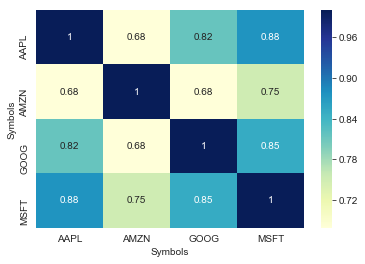

In [87]:
#Check the numerical values of correlations for daily returns of each stock:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True,cmap="YlGnBu")
plt.show()

It looks like Microsoft's daily returns have the strong correlation with both Apple and Google. Also, Google and Apple have strong correlation to each other.

In [88]:
#Now, let's have a look at the correlation between stocks for their closing price.

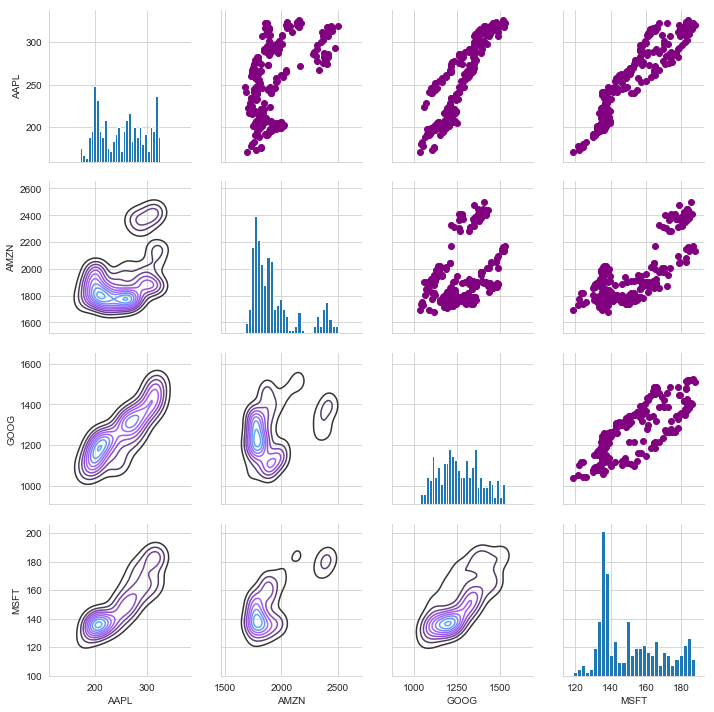

In [89]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

The pairs which seems to have a certain correlations: 
    1)Amazon and Apple
    2)Google and Apple
    3)Google and Microsoft.

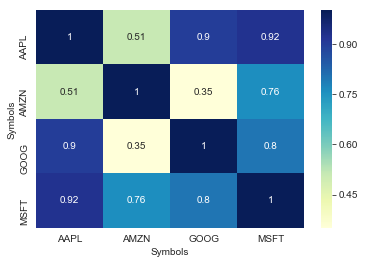

In [92]:
#Check the numerical values of correlations for the closing price of each stock:
closing_price_corr= closing_df.dropna().corr()
sns.heatmap(closing_price_corr, annot=True,cmap="YlGnBu")
plt.show()

We can see some very strong correlations between Apple and Microsoft, or between Apple and Google.

We can easily see that technical companies have positive correlations from different aspects.

In [93]:
#Analyze the risk of the stock:


We use one of the basic ways using the information we've gathered on daily percentage return is by comparing the expected return with the standard deviation of the daily returns

In [94]:
rets = tech_rets.dropna()

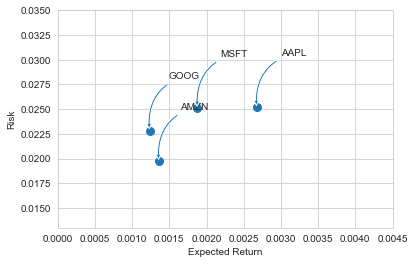

In [172]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

#Set the x and y limits of the plot:
plt.ylim([0.013,0.035])
plt.xlim([0.00,0.0045])



plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x ,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points',ha='right', va='bottom',
        arrowprops = dict(arrowstyle = 'simple',connectionstyle = 'arc3,rad=0.4'))

You would prefer a stock to have a high expected return with a low level of risk. However, there is no points satisfying this condition. We can see for apple which has the highest risk among these stocks, but you also need to take the highest context of risks. But comparing Amazon and Google, maybe Amazon is the better one to choose because of its higher expected return and a lower level of risk to take.

In [ ]:
#Analyze the Value of Risk:

Value at Risk:
It's the amount of money we could expect to lose or put at risk for a given confidence intervel.

We'll use two different methods to calculate the value of risk, the first one is "Bootstrap".

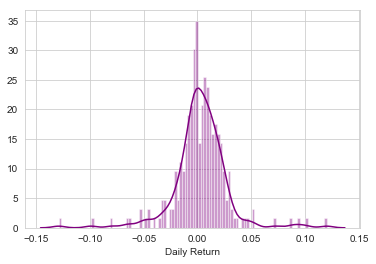

In [173]:
#For Apple stock (by applying Bootstrap): 
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [175]:
#Daily returns for each day:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-30,0.005187,-0.001578,0.001335,0.006323
2019-05-31,-0.018116,-0.022711,-0.012809,-0.016305
2019-06-03,-0.010110,-0.046409,-0.061071,-0.031048
2019-06-04,0.036584,0.021782,0.016232,0.027704
2019-06-05,0.016143,0.005169,-0.010284,0.021679


In [176]:
rets['AAPL'].quantile(0.05)

-0.03301109194900948

This means the 0.05 empirical quantile of daily returns is at negative 0.033. So, this means with 95% confidence, 95% of the times for simulations the worst daily loss would not exceed 3.3%. It means if you have one million investment, your one-day 5% VaR (value at risk) at worst $19,000. It means within 95% confidence, you're only gonna lost 1.9% of your money on any given day got Apple stock.

In [177]:
rets['MSFT'].quantile(0.05)

-0.03282078559538271

In [179]:
rets['GOOG'].quantile(0.05)

-0.03457167691969172

In [181]:
rets['AMZN'].quantile(0.05)

-0.027603259337557896

It seems that within 95% confidence interval, you will lose less money if you invest on the Amazon stock.

In [182]:
#The second method to calculate Value of Risk: Monte Carlo method

In [183]:
#Use the Goold stock information:
days = 365

dt = 1/days

#The expected daily return:
mu = rets.mean()['GOOG']

#The Valitility of the Stock:
sigma = rets.std()['GOOG']

In [191]:
def stock_monte_carlo(start_price,days,mu,sigma):
    #Create three arrays : 
    # price, drift and shock that were full of zeros of with the length for the number of days:
    price = np.zeros(days)
    price[0] = start_price
    
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price #price array
        
        
    

In [185]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951
2019-05-31,1109.599976,1100.180054,1101.290039,1103.630005,1507800,1103.630005
2019-06-03,1065.500000,1025.000000,1065.500000,1036.229980,5130600,1036.229980
2019-06-04,1056.050049,1033.689941,1042.900024,1053.050049,2833500,1053.050049


Text(0.5,1,'Monte Carlo Analysis for Google')

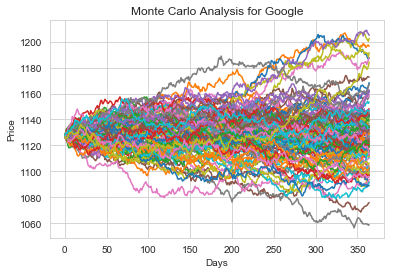

In [192]:
start_price = 1127.52

#Run the Monte Carlo function and plot it out for 100 times:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [194]:
#Run the Monte Carlo function and plot it out for 10,000 times:
runs = 10000

#Create a zeros array called 'simulations'
simulations = np.zeros(runs)

#Every run that points in the simulation is defined as the end price
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    
#We will get an array of all the ending price points for 10,000 runs.

Text(0.5,1,u'Final price distribution for Google stock after 365 days')

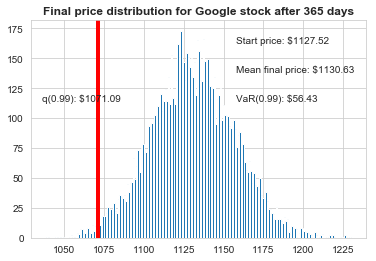

In [195]:
#Define q as the 1% empirical quantile
#It means that 99% of the values should fit within our output
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#Starting price:
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

#Mean of the ending price:
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

#Variance of the price (with 99% confidence interval):
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q,))

#Display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

#Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title:
plt.title(u"Final price distribution for Google stock after %s days" %days, weight ="bold")

It means the value at risk for each Google stock is going to be 56.43 dollars, which is the Value at Risk. So, 99 percent of the time of runing this Monte Carlo simulation, the amount of money you would lost at most, 99 percent of the time is 56.43 dollars .So, it's not a huge risk for an 1127.52 dollars initial investment.